#Jonathan Halverson
#Wednesday, February 24, 2016
#Population parameters,  point estimates, confidence intervals, CLT

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

from scipy.stats import norm
population = norm.rvs(loc=75.0, scale=12.0, size=2**15, random_state=1234)
print population.size, population.mean(), population.std()

32768 75.0613379898 11.9689494674


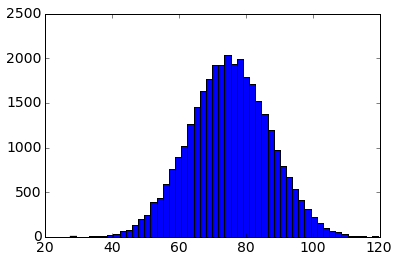

In [187]:
n, bins, patches = plt.hist(population, bins=50)

# A range of sample sizes

###Here we compute the mean and standard deviation of different size samples and plot them (running average):

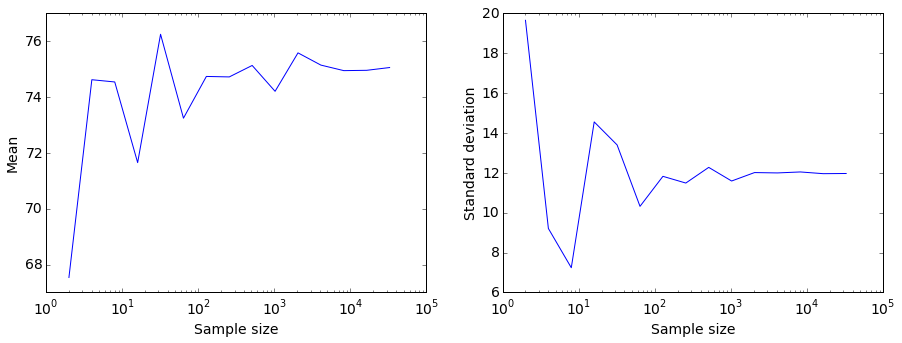

In [188]:
import numpy as np
from random import sample
from random import seed as random_seed

random_seed(0)
def sample_mean_std(population, sample_size):
    """Return the mean and standard deviation for a
       sample of the populations."""
    s = np.array(sample(population, sample_size))
    return s.mean(), s.std(ddof=1)

ns = [2**x for x in range(1, 16)]
pairs = [sample_mean_std(population, n) for n in ns]
means, stds = zip(*pairs)
ses = [s / np.sqrt(n) for n, s in zip(ns, stds)]

fig = plt.figure(1, figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
plt.semilogx(ns, means)
plt.xlabel('Sample size')
plt.ylabel('Mean')

ax2 = fig.add_subplot(1, 2, 2)
plt.semilogx(ns, stds)
plt.xlabel('Sample size')
plt.ylabel('Standard deviation')

### The sample mean approaches the population mean with increasing sample size. Same for the standard deviation. Below we plot the standard error of the sample mean on log-log scales.

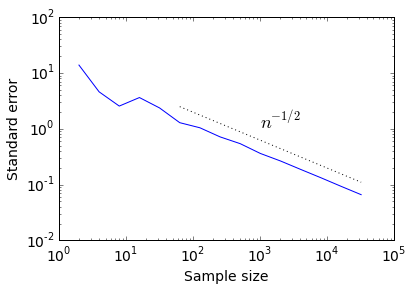

In [189]:
plt.loglog(ns, ses)
plt.loglog(ns[5:], 20 * np.array(ns[5:])**-0.5, 'k:')
plt.text(1000, 1, '$n^{-1/2}$', fontsize=18)
plt.ylim(0.01, 100)
plt.xlabel('Sample size')
plt.ylabel('Standard error')

### The standard error in the mean of the sample decreases with sample size as $n^{-1/2}$.

# Samples of the same size (sampling distribution)

###Let's look at the variability in samples of the same size: 

75.1712789543 1.76170606001


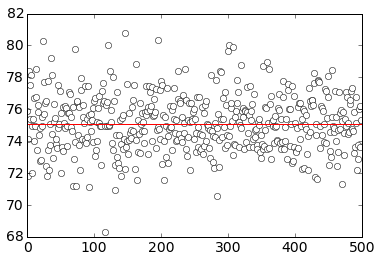

In [190]:
samples = 500
pairs = [sample_mean_std(population, sample_size=50) for _ in range(samples)]
means, stds = zip(*pairs)
print sum(means) / len(means), np.array(means).std()
plt.plot(range(samples), means, 'wo')
plt.plot([0, samples], [population.mean(), population.mean()], 'r-')

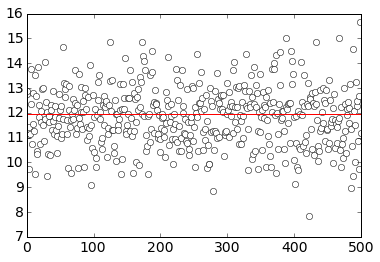

In [191]:
plt.plot(range(samples), stds, 'wo')
plt.plot([0, samples], [population.std(), population.std()], 'r-')

###The mean $\bar{x}$ and $\sigma_{\bar{x}}$ are printed out above. The quantity $\sigma_{\bar{x}}$ provides a measure of the width of the distribution. It is taken as the standard error in $\bar{x}$. That is, $SE_{\bar{x}}=\sigma_{\bar{x}}$. The standard error in the point estimate of the population mean is also $\sigma_{x}/\sqrt{n}$, where $\sigma_{x}$ is the standard deviation of the population. Here is the calculation as a check:

In [192]:
population.std() / np.sqrt(50), np.array(means).std()

(1.6926650664109706, 1.7617060600128513)

### Usually we will only have one sample. Common practice is to assume that the standard deviation of the sample is the same as the population (less 1 degree of freedom). Knowing the sample mean and standard deviation, we can construct a confidence interval for a given critical z-value like 1.96. One can also do hypothesis testing.

# Conditions for $\bar{x}$ being nearly normal and SE being accurate
### Keep in mind the original data must consist of independent samples, be approximately normally distributed (little to no skew). A large sample size (n > 30) will help reduce concerns with skew since the CLT tells us that the sampling distribution will be normal for large n for any population.

### The sampling distribution of $\bar{x}$ is given below:

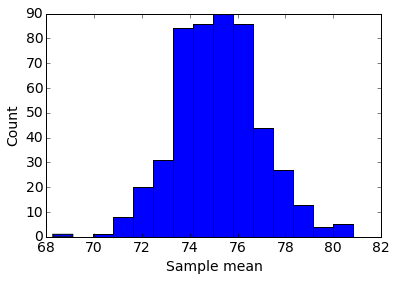

In [203]:
n, bins, patches = plt.hist(means, bins=15)
plt.xlabel("Sample mean")
plt.ylabel("Count")

###It is useful to think of a particular point estimate as being drawn from such a distribution. Note that the std of the population divided by the square root of the sample size is equal to the std of the sampling distribution (this is expected from the CLT).

###In general we won't have the population std, so we use the std of the sample instead. So the standard error of the sample mean (point estimate) is the standard deviation of the sample divided by the square root of the sample size. 

#Confidence intervals 

###Here we construct a 95% confidence interval based on a single sample. We then carry out a numerical experiment to see if 95 of 100 means capture the population mean. 

In [194]:
x_bar, sigma = sample_mean_std(population, sample_size=100)
# lo = x_bar - 1.96 * sigma / np.sqrt(100)
# hi = x_bar + 1.96 * sigma / np.sqrt(100)
lo, hi = norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(100))
print lo, hi

71.7655240362 76.3652472169


###We are 95% confident that the population mean is between 71.8 and 76.4. A confidence interval says nothing about the confidence of capturing individual observations.

###But what does “95% confident” mean? Suppose we took many samples and built a confidence interval from each sample using Equation (4.8). Then on average 95% of those intervals would contain the actual mean, μ. 

In [195]:
mu = population.mean()
inside = 0
trials = 1000
for _ in range(trials):
    x_bar, sigma = sample_mean_std(population, sample_size=100)
    lo, hi = norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(100))
    if (lo < mu < hi): inside += 1
print float(inside) / trials

0.96


# Would a value of 100 be surprising?

### Looking at the histogram at the very top, the value of 100 would be in the tail. Let's compute the probability of getting 100 or more.

In [196]:
p_gt_100 = sum([1 for p in population if p >= 100.0]) / float(population.size)
print p_gt_100

0.0181884765625


In [197]:
Z_score = (100.0 - population.mean()) / population.std()
print Z_score

2.08361327602


### Asking this question by looking at the sampling distribution makes no sense since as the sample size grows the standard deviation decreases.

In [198]:
p_gt_100 = sum([1 for p in means if p >= 100.0]) / float(len(means))
print p_gt_100

0.0


### However, what if we adjust for this decrease by first making the means a standard normal and then assigning a standard deviation that accounts for the sample size (and the same mean of course):

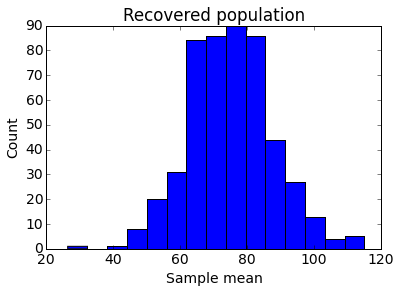

In [204]:
means_normalized = [(m - np.array(means).mean()) / np.array(means).std() for m in means]
means_rescaled = [m * np.array(means).std() * np.sqrt(50) + np.array(means).mean() for m in means_normalized]
n, bins, patches = plt.hist(means_rescaled, bins=15)
plt.title("Recovered population")
plt.xlabel("Sample mean")
plt.ylabel("Count")

In [200]:
p_gt_100 = sum([1 for p in means_rescaled if p >= 100.0]) / float(len(means_rescaled))
print p_gt_100

0.026


### This approached gives 0.026 compared to 0.018 from the true population. So by taking the sampling distribution and correcting its standard deviation, we were able to roughly generate a coarse version of the original population and get a reasonable value for the fraction of samples of 100 or greater.

### If the population represented grades on a national exam,  did the 50 students for a certain town have a better average score or the same as the national average?

In [201]:
sample_size = 50
sample_mean, sample_std = sample_mean_std(population, sample_size)
population_mean = population.mean()

SE = sample_std / np.sqrt(sample_size)

z_score = (sample_mean - population_mean) / SE
p_value = norm.cdf(z_score)
print sample_mean, population_mean, p_value, p_value > 0.05

73.4447513015 75.0613379898 0.197698478462 True


### The average national score is 75.06, which is the population. The data are independent and normal. The specific town (sample) scored an average of 73.44. This leads to a p-value of 0.2 which suggests that we accept the null hypothesis that the town had the same average score as the nation.

###Here's an aside on the disassembler: 

In [202]:
import dis
dis.dis(sample_mean_std)

  9           0 LOAD_GLOBAL              0 (np)
              3 LOAD_ATTR                1 (array)
              6 LOAD_GLOBAL              2 (sample)
              9 LOAD_FAST                0 (population)
             12 LOAD_FAST                1 (sample_size)
             15 CALL_FUNCTION            2
             18 CALL_FUNCTION            1
             21 STORE_FAST               2 (s)

 10          24 LOAD_FAST                2 (s)
             27 LOAD_ATTR                3 (mean)
             30 CALL_FUNCTION            0
             33 LOAD_FAST                2 (s)
             36 LOAD_ATTR                4 (std)
             39 LOAD_CONST               1 ('ddof')
             42 LOAD_CONST               2 (1)
             45 CALL_FUNCTION          256
             48 BUILD_TUPLE              2
             51 RETURN_VALUE        
